<h1>Exploring COVID data with pandas</h1><br>
These visulisations were produced from covid data on the <a href=https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide>ECDC</a> (European Centre for Disease Prevention and Control) website. This data covers all countries and is analysed up to the 30th September 2020.

**downloads**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
pip install plotly

In [71]:
pip install cufflinks

  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=9d8e9de1d2a75295ec457323e30b57f87cfdab98fb2e5df0b984c066e7a4e6d8
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install chart_studio
#Chart Studio provides a web-service for hosting graphs

Note: you may need to restart the kernel to use updated packages.


In [154]:
import chart_studio
chart_studio.tools.set_credentials_file(username='pitterb', api_key='HR1ydPxFqxTi9253gQd9')

In [122]:
from plotly import __version__

In [123]:
print(__version__)

4.10.0


In [124]:
import cufflinks as cf

In [125]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [143]:
import plotly.offline as py

In [126]:
init_notebook_mode(connected=True)

In [127]:
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

**Importing the data**

In [5]:
covid_data=pd.read_excel(r'C:\Users\HP\Documents\IBM Cloud work\COVID-19-geographic-disbtribution-worldwide-2020-09-30.xlsx')

In [6]:
covid_data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-30,30,9,2020,15,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847
1,2020-09-29,29,9,2020,12,3,Afghanistan,AF,AFG,38041757.0,Asia,1.114565
2,2020-09-28,28,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.343261
3,2020-09-27,27,9,2020,35,0,Afghanistan,AF,AFG,38041757.0,Asia,1.540413
4,2020-09-26,26,9,2020,6,2,Afghanistan,AF,AFG,38041757.0,Asia,1.540413
5,2020-09-25,25,9,2020,16,0,Afghanistan,AF,AFG,38041757.0,Asia,1.614016
6,2020-09-24,24,9,2020,25,5,Afghanistan,AF,AFG,38041757.0,Asia,1.645560
7,2020-09-23,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931
8,2020-09-22,22,9,2020,30,3,Afghanistan,AF,AFG,38041757.0,Asia,1.524640
9,2020-09-21,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134


In [7]:
covid_data.count()

dateRep                                                       46017
day                                                           46017
month                                                         46017
year                                                          46017
cases                                                         46017
deaths                                                        46017
countriesAndTerritories                                       46017
geoId                                                         45817
countryterritoryCode                                          45953
popData2019                                                   45953
continentExp                                                  46017
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    43236
dtype: int64

In [8]:
covid_data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,46017.000000,46017.000000,46017.000000,46017.000000,46017.000000,4.595300e+04,43236.000000
mean,16.113958,5.787904,2019.998544,732.655214,21.925202,4.256158e+07,34.978382
std,8.822140,2.272985,0.038130,4518.466645,125.760776,1.570984e+08,79.646014
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,9.000000,4.000000,2020.000000,0.000000,0.000000,1.355982e+06,0.418142
50%,16.000000,6.000000,2020.000000,10.000000,0.000000,8.082359e+06,4.825063
75%,24.000000,8.000000,2020.000000,160.000000,3.000000,2.860872e+07,29.040202
max,31.000000,12.000000,2020.000000,97894.000000,4928.000000,1.433784e+09,1058.225943


In [9]:
covid_data.geoId.unique()
#Lists all unique elements of 'geoId'

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'JPG11668', 'KY', 'CF', 'TD', 'CL', 'CN',
       'CO', 'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD',
       'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ',
       'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME',
       'MS', 'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE',
       'NG', 'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA

In [28]:
covid_data.loc[covid_data.geoId == 'NL'].head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
29923,2020-09-30,30,9,2020,3001,13,Netherlands,NL,NLD,17282163.0,Europe,189.345512
29924,2020-09-29,29,9,2020,2909,6,Netherlands,NL,NLD,17282163.0,Europe,179.942754
29925,2020-09-28,28,9,2020,2989,8,Netherlands,NL,NLD,17282163.0,Europe,170.621004


In [34]:
covid_data.loc[covid_data.geoId == 'UK'].head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
43488,2020-09-30,30,9,2020,7143,71,United_Kingdom,UK,GBR,66647112.0,Europe,107.923656
43489,2020-09-29,29,9,2020,4044,13,United_Kingdom,UK,GBR,66647112.0,Europe,101.861878
43490,2020-09-28,28,9,2020,5692,17,United_Kingdom,UK,GBR,66647112.0,Europe,99.726752


In [4]:
covid_data[covid_data['geoId'].isna()]
#reproduces the dataframe, showing where it is null for the 'geoID'

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
29461,2020-09-30,30,9,2020,19,2,Namibia,NaN,NAM,2494524.0,Africa,49.668795
29462,2020-09-29,29,9,2020,88,0,Namibia,NaN,NAM,2494524.0,Africa,52.234414
29463,2020-09-28,28,9,2020,115,0,Namibia,NaN,NAM,2494524.0,Africa,52.675380
29464,2020-09-27,27,9,2020,83,0,Namibia,NaN,NAM,2494524.0,Africa,52.675380
29465,2020-09-26,26,9,2020,95,0,Namibia,NaN,NAM,2494524.0,Africa,56.042756
...,...,...,...,...,...,...,...,...,...,...,...,...
29656,2020-03-19,19,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
29657,2020-03-18,18,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
29658,2020-03-17,17,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN
29659,2020-03-16,16,3,2020,0,0,Namibia,NaN,NAM,2494524.0,Africa,NaN


In [6]:
cv19_geo=covid_data.dropna(subset=['geoId']).pivot(index='dateRep',columns='geoId',values=['cases','deaths'])
#dropna will drop the rows with null values for 'geoId'

In [6]:
cv19_geo.head()

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
dateRep                                                   ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  

[5 rows x 418 columns]

In [90]:
cv19_geo.describe().transpose()

count        mean         std   min  25%    50%    75%     max
       geoId                                                                
cases  AD     201.0    9.781095   19.967770   0.0  0.0    1.0   11.0   130.0
       AE     269.0  346.059480  296.146602   0.0  2.0  356.0  552.0  1083.0
       AF     265.0  148.128302  225.239869   0.0  0.0   38.0  190.0  1063.0
       AG     195.0    0.517949    2.936341   0.0  0.0    0.0    0.0    39.0
       AI     188.0    0.015957    0.162733   0.0  0.0    0.0    0.0     2.0
...             ...         ...         ...   ...  ...    ...    ...     ...
deaths XK     201.0    3.109453    4.974732 -12.0  0.0    1.0    5.0    40.0
       YE     174.0    3.379310    6.261621   0.0  0.0    2.0    4.0    52.0
       ZA     207.0   80.516908   92.204966   0.0  6.5   52.0  116.5   572.0
       ZM     196.0    1.693878    4.870441   0.0  0.0    0.0    1.0    40.0
       ZW     194.0    1.175258    2.844904   0.0  0.0    0.0    1.0    18.0

[418 rows x 8 columns]

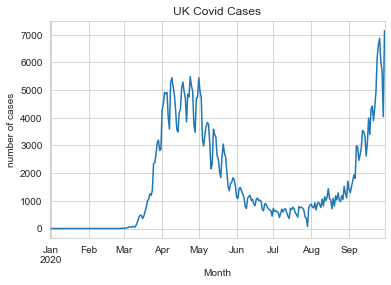

In [36]:
cv19_geo['cases']['UK'].plot()
sns.set_style('whitegrid')
plt.ylabel('number of cases')
plt.xlabel('Month')
plt.title('UK Covid Cases');
#Graph of number of cases in the UK

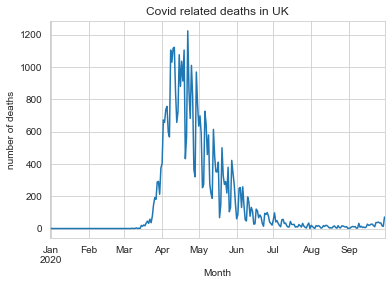

In [42]:
cv19_geo['deaths']['UK'].plot()
sns.set_style('whitegrid')
plt.ylabel('number of deaths')
plt.xlabel('Month')
plt.title('Covid related deaths in UK');
#Graph of number of cases in the UK

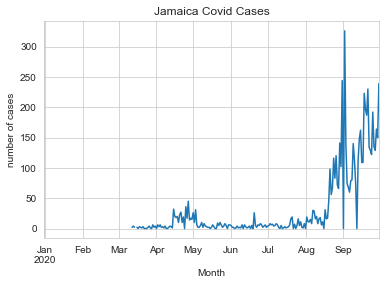

In [39]:
cv19_geo['cases']['JM'].plot()
sns.set_style('whitegrid')
plt.ylabel('number of cases')
plt.xlabel('Month')
plt.title('Jamaica Covid Cases');
#Graph of number of cases in Jamaica

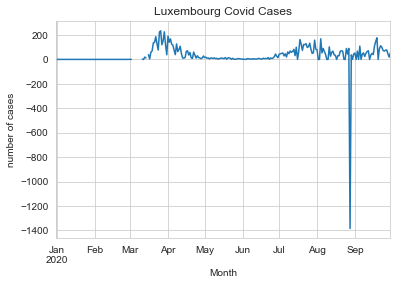

In [68]:
cv19_geo['cases']['LU'].plot()
sns.set_style('whitegrid')
plt.ylabel('number of cases')
plt.xlabel('Month')
plt.title('Luxembourg Covid Cases');
#Luxembourg has a negative number of cases and some missing data
#This data will need to be extracted out

<h2>UK Data<h2>

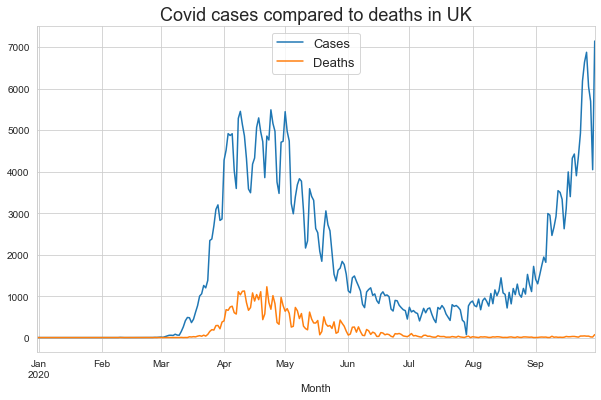

In [196]:
cv19_geo[[('cases','UK'),('deaths','UK')]].plot(figsize=(10,6))
sns.set_style('whitegrid')
plt.xlabel('Month',fontsize=11)
plt.title('Covid cases compared to deaths in UK',fontsize=18);
plt.legend(["Cases", "Deaths"],loc=9,fontsize=13);

In [156]:
cv_casesuk=pd.DataFrame(cv19_geo[[('cases','UK'),('deaths','UK')]])

In [157]:
cv_casesuk.head()

,cases,deaths
geoId,UK,UK
dateRep,,
2019-12-31,0.0,0.0
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,0.0,0.0


In [172]:
import plotly.graph_objects as go

fig = go.Figure()

In [176]:
cv_casesuk.iplot()

In [49]:
cv19_geo[[('cases','UK')]].describe()

,cases
geoId,UK
count,275.000000
mean,1622.385455
std,1743.978304
min,0.000000
25%,58.500000
50%,986.000000
75%,2770.000000
max,7143.000000


In [50]:
cv19_geo[[('deaths','UK')]].loc['20200901':].describe()
#Mean number of deaths daily in September, has been 19

,deaths
geoId,UK
count,30.000000
mean,19.100000
std,15.304608
min,2.000000
25%,9.000000
50%,13.500000
75%,27.000000
max,71.000000


In [52]:
cv19_geo[[('deaths','UK')]].loc['20200331':'20200430'].describe()
#From the end of March to April, average deaths were 786 per day

,deaths
geoId,UK
count,31.000000
mean,786.225806
std,256.316173
min,320.000000
25%,628.000000
50%,769.000000
75%,1020.000000
max,1224.000000


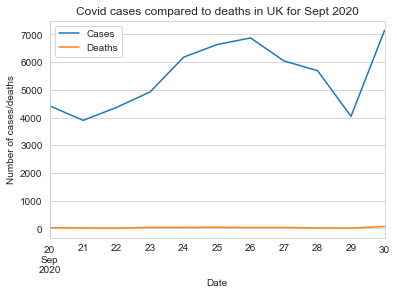

In [16]:
cv19_geo[[('cases','UK'),('deaths','UK')]].loc['20200920':].plot()
sns.set_style('whitegrid')
plt.xlabel('Date')
plt.ylabel('Number of cases/deaths')
plt.title('Covid cases compared to deaths in UK for Sept 2020',fontsize=12);
plt.legend(["Cases", "Deaths"],loc=2);

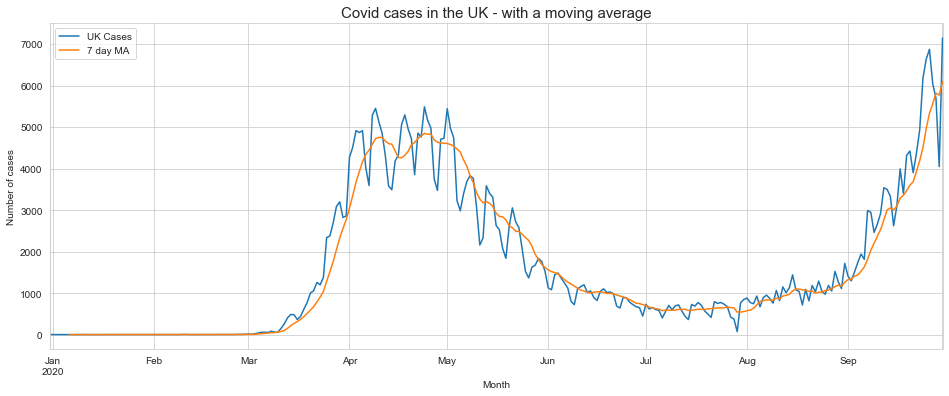

In [116]:
#7 day Moving average for cases
cv19_geo['cases: 7 Day MA']=cv19_geo[('cases','UK')].rolling(7).mean()

#UK cases
cv19_geo['UK cases']=cv19_geo[('cases','UK')]

#Final plot
cv19_geo[['UK cases','cases: 7 Day MA']].plot(figsize=(16,6))

plt.xlabel('Month')
plt.ylabel('Number of cases')
plt.title('Covid cases in the UK - with a moving average',fontsize=15)
plt.legend(["UK Cases", "7 day MA"]);

TypeError: 'type' object is not subscriptable

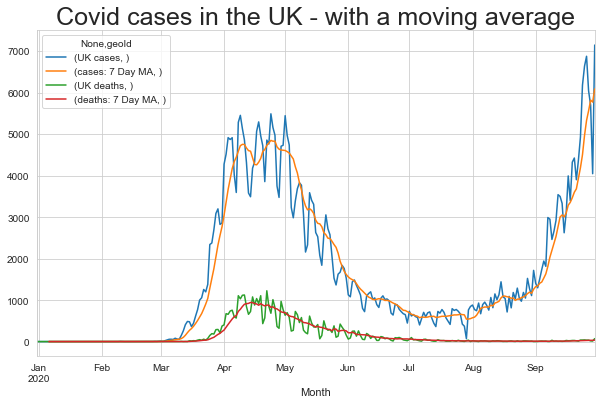

In [13]:
sns.set_style('whitegrid')

#7 day Moving average for cases
cv19_geo['cases: 7 Day MA']=cv19_geo[('cases','UK')].rolling(7).mean()

#7 day Moving average for deaths
cv19_geo['deaths: 7 Day MA']=cv19_geo[('deaths','UK')].rolling(7).mean()

#UK cases
cv19_geo['UK cases']=cv19_geo[('cases','UK')]

#UK deaths
cv19_geo['UK deaths']=cv19_geo[('deaths','UK')]

#Final plot
cv19_geo[['UK cases','cases: 7 Day MA','UK deaths','deaths: 7 Day MA']].plot(figsize=(10,6))


plt.xlabel('Month',fontsize=11)
plt.title('Covid cases in the UK - with a moving average',fontsize=25)
plt.legend(hist_kws=dict["UK cases", "cases:7 day MA","UK deaths","deaths:7 day MA"]);

In [7]:
#7 day Moving average for cases
cv19_geo['cases: 7 Day MA']=cv19_geo[('cases','UK')].rolling(7).mean()

#7 day Moving average for deaths
cv19_geo['deaths: 7 Day MA']=cv19_geo[('deaths','UK')].rolling(7).mean()

#UK cases
cv19_geo['UK cases']=cv19_geo[('cases','UK')]

#UK deaths
cv19_geo['UK deaths']=cv19_geo[('deaths','UK')]

#Final plot
cv19_geo[['UK cases','cases: 7 Day MA','UK deaths','deaths: 7 Day MA']].iplot()

plt.xlabel('Month',fontsize=11)
plt.title('Covid cases in the UK - with a moving average',fontsize=25)
plt.legend(["UK cases", "cases:7 day MA","UK deaths","deaths:7 day MA"]);

AttributeError: 'DataFrame' object has no attribute 'iplot'

<h2>China</h2>

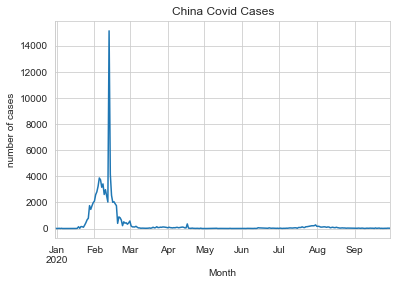

In [69]:
cv19_geo['cases']['CN'].plot()
sns.set_style('whitegrid')
plt.ylabel('number of cases')
plt.xlabel('Month')
plt.title('China Covid Cases');

In [70]:
cv19_geo['cases']['CN'].max()
#Max number of cases in China on a given day
#This big spike was due to an extra 15000 cases being counted

15141.0

In [71]:
cv19_geo['cases']['CN'].idxmax()
#The first spike was on 13/02/20 

Timestamp('2020-02-13 00:00:00')

<h2> Cumulative Graphs </h2>

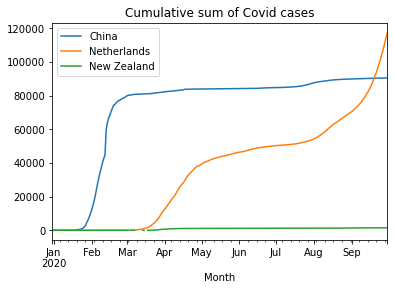

In [46]:
cv19_geo['cases'][['CN','NL','NZ']].cumsum().plot()
plt.title('Cumulative sum of Covid cases')
plt.legend(["China", "Netherlands","New Zealand"])
plt.xlabel('Month');

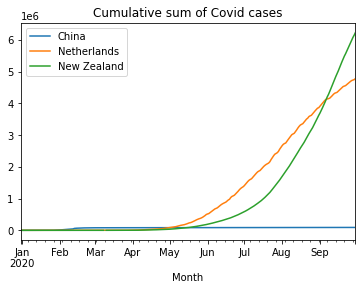

In [47]:
cv19_geo['cases'][['CN','BR','IN']].cumsum().plot()
plt.title('Cumulative sum of Covid cases')
plt.legend(["China", "Netherlands","New Zealand"])
plt.xlabel('Month');
#Beacuse the case numbers are so large (espc. in Brazil), the scale of the graph is to the power of

<ipython-input-48-611ef3188cd4>:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(cv19_geo['cases'][['CN','BR','IN']].cumsum()).plot()


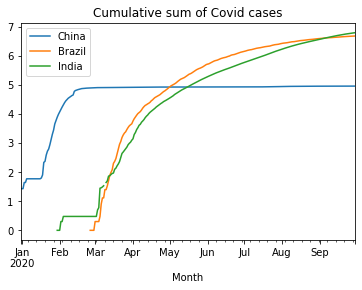

In [48]:
np.log10(cv19_geo['cases'][['CN','BR','IN']].cumsum()).plot()
plt.title('Cumulative sum of Covid cases')
plt.legend(["China", "Brazil","India"])
plt.xlabel('Month');
#I've now implemented the log funtion, so the comparison between the countries is a lot clearer now

Using the **shift** function

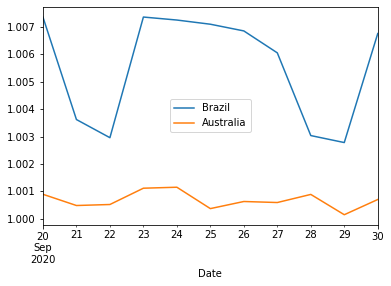

In [42]:
(cv19_geo.cumsum() / cv19_geo.shift(1).cumsum())['cases'][['BR', 'AU']].loc['20200920':].plot()
plt.legend(["Brazil","Australia"],loc=10)
plt.xlabel('Date');
#total/total of yesterday (i.e. shift 1) -->allows you to see the relative rise in cases

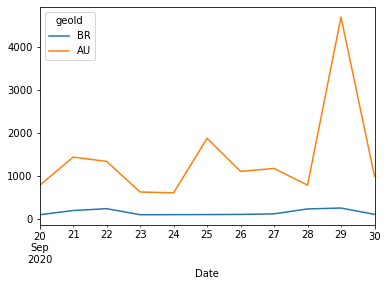

In [44]:
(np.log10(2)/np.log10(cv19_geo.cumsum() / cv19_geo.shift(1).cumsum()))['cases'][['BR', 'AU']].loc['20200920':].plot()
#plt.legend(["Brazil","Australia"],loc=10)
plt.xlabel('Date');

#Insert the log functions, to allow you to see the numbers more clearly

<h2>Rolling Means</h2>

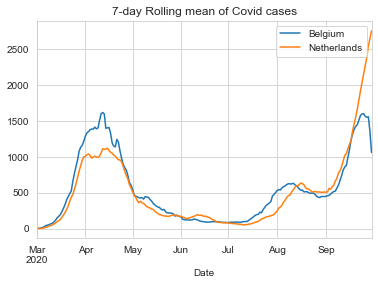

In [77]:
cv19_geo['cases'][['BE','NL']].rolling(7).mean().loc['20200301':].plot()
plt.title('7-day Rolling mean of Covid cases')
plt.xlabel('Date')
plt.legend(["Belgium","Netherlands"]);
#Rolling 7-day mean for cases in Belgium and Netherlands
#The average number of cases every 7 days

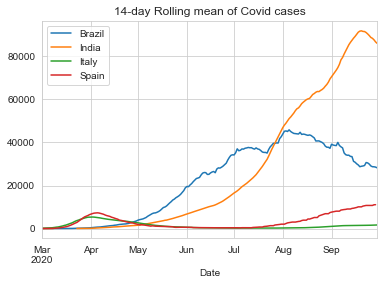

In [81]:
cv19_geo['cases'][['BR','IN','IT','ES']].rolling(14).mean().loc['20200301':].plot()
plt.title('14-day Rolling mean of Covid cases')
plt.xlabel('Date')
plt.legend(["Brazil","India","Italy","Spain"]);
#For very large datasets; a rolling average smooths out the graph a lot more